In [12]:
# Everything you need to change is in this cell. 
# Set target equal to the target you want to graph (target name must be in quotes).
# Each of the paths must be filled with the locations of each of the documents on your desktop.

target = "CD63"

PLATE_LAYOUT_FILE = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\Plate Layout.xlsx"
RAW_DATA_FILE = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\LCSET_28343_10-4-2023_EXTENDED_NPX_2023-10-20.csv"
MANIFEST_PATH = "C:\\Users\\Wyss User\\Documents\\EVs\\OLINK\\Shah (BWH)_OLINK_SK-5T4V_2023-06-27_MN UPDATES 82823.xlsx"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
CSF_SAMPLE_NUMBERS = ["CSF1", "CSF2", "CSF3", "CSF4", "CSF5", "CSF6", "CSF7", "CSF8"]
UNIMPORTANT_COLUMNS = [
    "Index",
    "OlinkID",
    "Panel_Lot_Nr",
    "PlateID",
    "WellID",
    "Normalization",
    "Processing_StartDate",
    "Processing_EndDate",
    "AnalyzerID",
    "ExploreVersion",
]
X_AXIS_ORDER = [
    "Fract 6",
    "Fract 7",
    "Fract 8",
    "Fract 9",
    "Fract 10",
    "Fract 11",
    "Fract 12",
    "Fract 13",
    "Fract 14",
    "Fract 15",
]

In [10]:
# clean up the raw olink data file and map the sample locations to their barcodes

plate_layout = pd.read_excel(PLATE_LAYOUT_FILE)
raw_data = pd.read_csv(RAW_DATA_FILE, sep=";")
manifest = pd.read_excel(MANIFEST_PATH)

raw_data = raw_data.drop(UNIMPORTANT_COLUMNS, axis=1)

sample_location_dict = dict(zip(manifest.SampleID, manifest.Broad_Sample_ID))
raw_data["Location"] = raw_data["SampleID"].map(sample_location_dict)

layout_dict = dict(zip(plate_layout.Location, plate_layout.Sample))
layout_dict2 = dict(zip(plate_layout.Location, plate_layout.Additional_info))
layout_dict3 = dict(zip(plate_layout.Location, plate_layout.CSF_sample))

raw_data["Sample Description"] = raw_data["Location"].map(layout_dict)
raw_data["Additional Information"] = raw_data["Location"].map(layout_dict2)
raw_data["Sample Number"] = raw_data["Location"].map(layout_dict3)


def make_linear(x):
    return 2**x


raw_data["Linear NPX"] = raw_data["NPX"].map(make_linear)

filtered_npx = raw_data[
    (raw_data["NPX"] > raw_data["LOD"])
    & (raw_data["QC_Warning"] == "PASS")
    & (raw_data["Assay_Warning"] == "PASS")
]


def plot_by_target(target):
    target_df = filtered_npx[
        (filtered_npx["Assay"] == target)
        & (filtered_npx["Sample Description"].str.contains("Fract"))
    ]
    medians = target_df.groupby("Sample Description")["Linear NPX"].median()
    medians.index = medians.index.map(lambda x: int(x.split()[-1]))
    medians = medians.sort_index()
    plt.bar(medians.index, medians, color="k", alpha=0.75)
    plt.xlabel("Fraction")
    plt.ylabel("Linear NPX")
    plt.title(f"{target} Median Fractionation Pattern")
    # plt.axhline(y = fract_df["LOD"][0], color = "red", linestyle = "--", label = "LOD")
    plt.xticks(rotation=45, ha="right")
    plt.show()
    for sample in CSF_SAMPLE_NUMBERS:
        sample_df = target_df[target_df["Sample Number"] == sample]
        sample_grouped = sample_df.groupby("Sample Description")["Linear NPX"].median()
        sample_grouped.index = sample_grouped.index.map(lambda x: int(x.split()[-1]))
        sample_grouped = sample_grouped.sort_index()
        plt.bar(sample_grouped.index, sample_grouped, color="k", alpha=0.75)
        plt.xlabel("Fraction")
        plt.ylabel("Linear NPX")
        plt.title(f"{sample} {target} Fractionation Pattern")
        plt.xticks(rotation=45, ha="right")
        plt.show()
    healthy_target_df = filtered_npx[
    (filtered_npx["Assay"] == target)
    & (filtered_npx["Sample Description"].str.contains("Fract"))
    & (filtered_npx["Additional Information"].str.contains("Healthy"))
    ]

    medians = healthy_target_df.groupby("Sample Description")["Linear NPX"].median()
    medians.index = medians.index.map(lambda x: int(x.split()[-1]))
    medians = medians.sort_index()
    plt.bar(medians.index, medians, color="k", alpha=0.75)
    plt.xlabel("Fraction")
    plt.ylabel("Linear NPX")
    plt.title(f"Healthy Samples {target} Median Fractionation Pattern")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    ad_target_df = filtered_npx[
        (filtered_npx["Assay"] == target)
        & (filtered_npx["Sample Description"].str.contains("Fract"))
        & (filtered_npx["Additional Information"].str.contains("AD"))
    ]
    medians = ad_target_df.groupby("Sample Description")["Linear NPX"].median()
    medians.index = medians.index.map(lambda x: int(x.split()[-1]))
    medians = medians.sort_index()
    plt.bar(medians.index, medians, color="k", alpha=0.75)
    plt.xlabel("Fraction")
    plt.ylabel("Linear NPX")
    plt.title(f"AD Samples {target} Median Fractionation Pattern")
    plt.xticks(rotation=45, ha="right")
    plt.show()

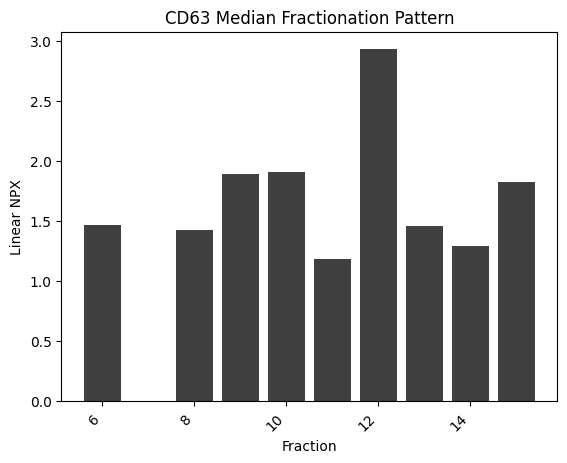

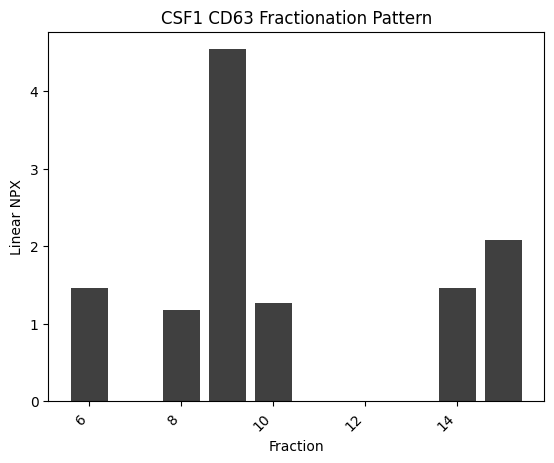

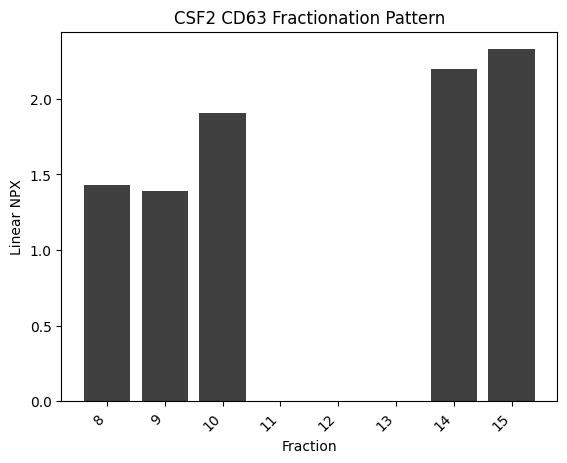

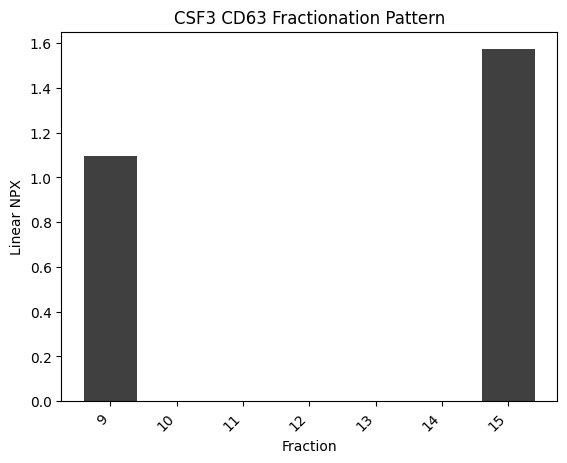

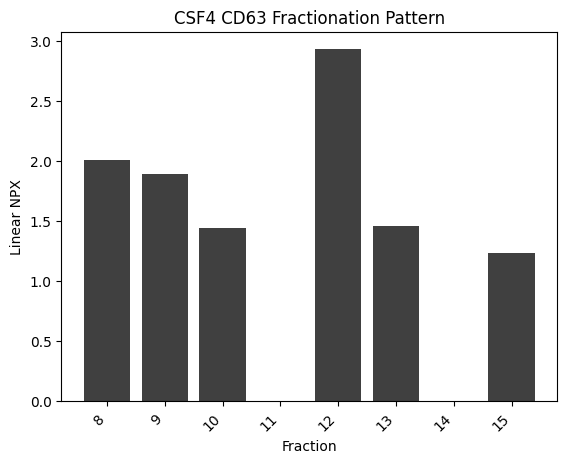

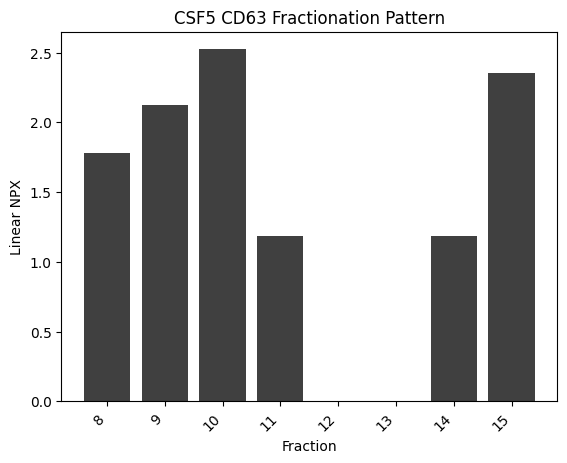

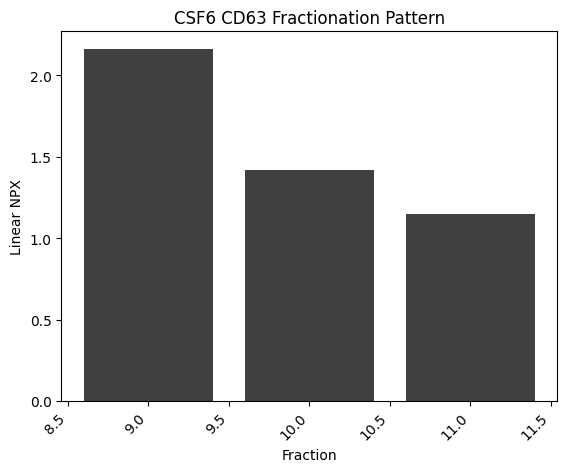

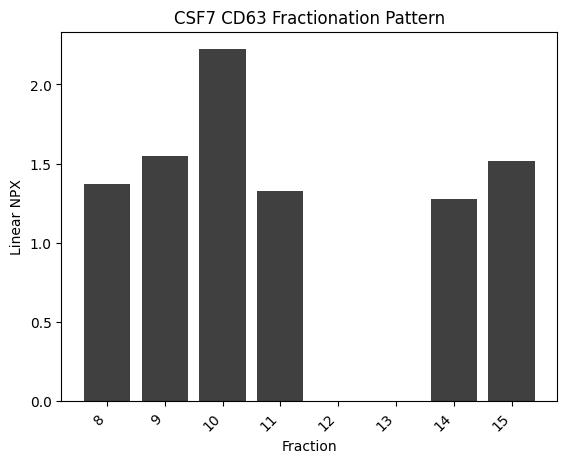

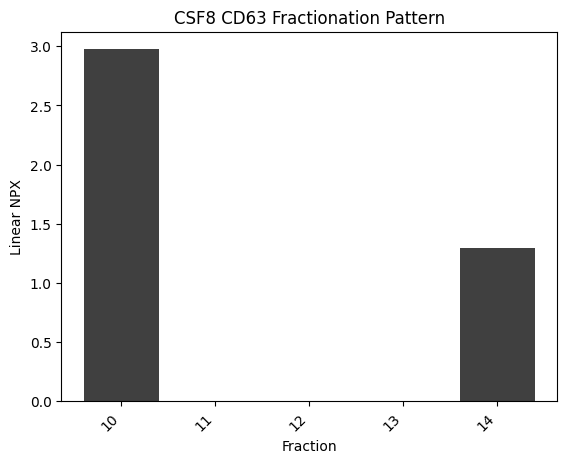

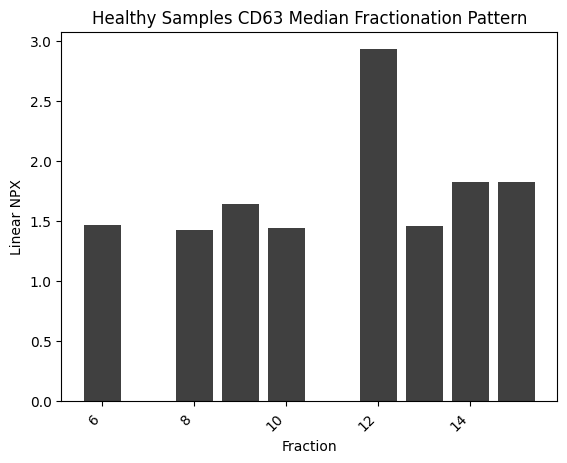

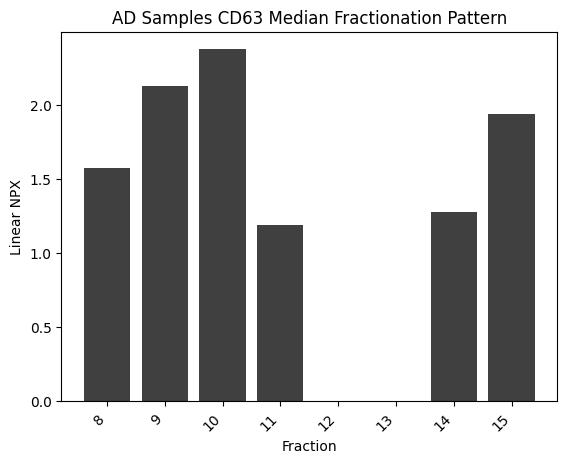

In [13]:
plot_by_target(target)